In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import SVDpp
from surprise import accuracy
from surprise.model_selection import KFold
from adjustText import adjust_text
import seaborn as sns; sns.set()


In [112]:
movie_id_files = ['./data/chosen_movies.txt', 
                  './data/most_popular.txt', 
                  './data/best.txt', 
                  './data/ten_comedies.txt',
                  './data/ten_mysteries.txt',
                  './data/ten_romances.txt']
titles = ['10 Chosen Movies', '10 Most Popular Movies', '10 Best Movies', '10 Comedies', '10 Mysteries', '10 Romances']
V_data_files = ['./data/V_reg_0.1_eta_0.01.txt', 
                  './data/V_a_b.txt', 
                  './data/SVDpp.txt']

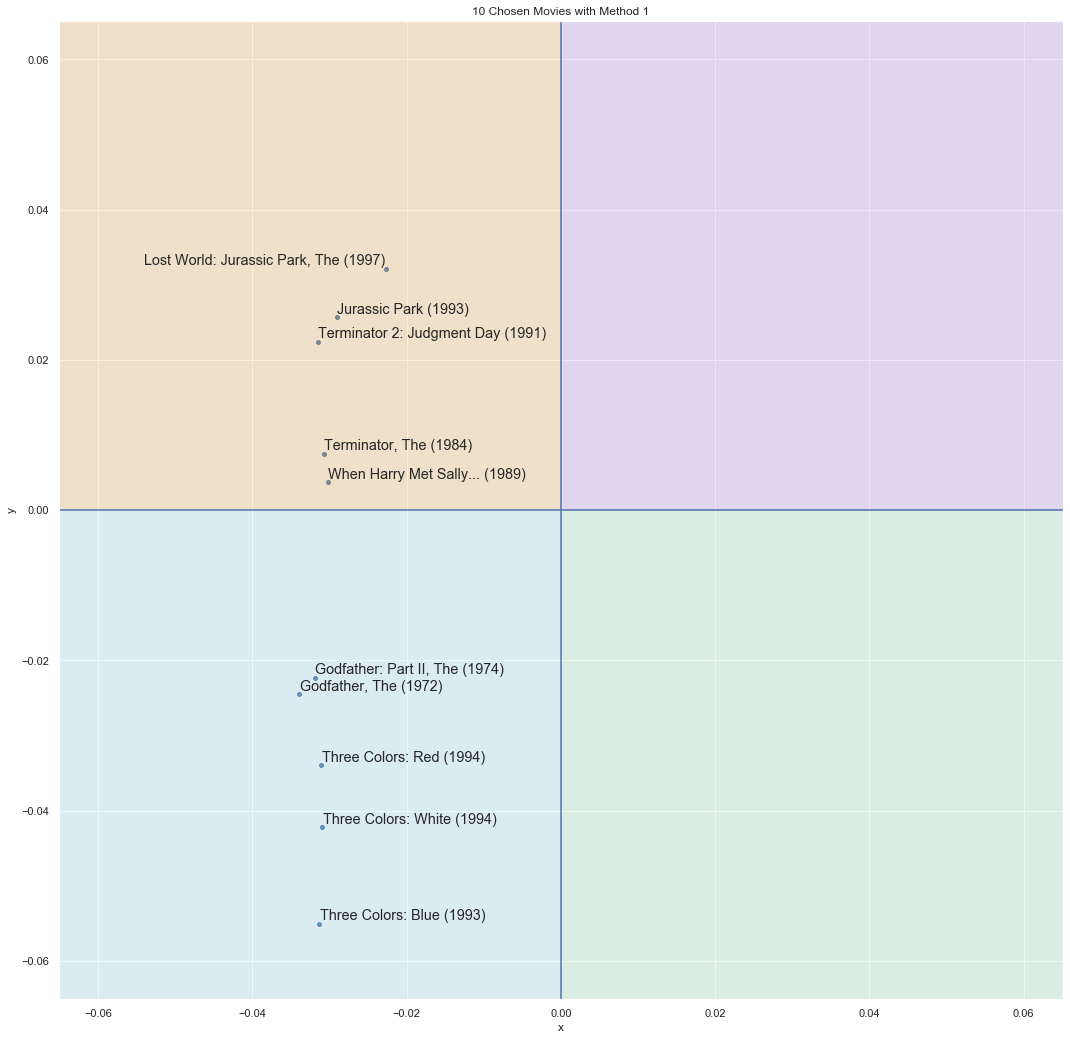

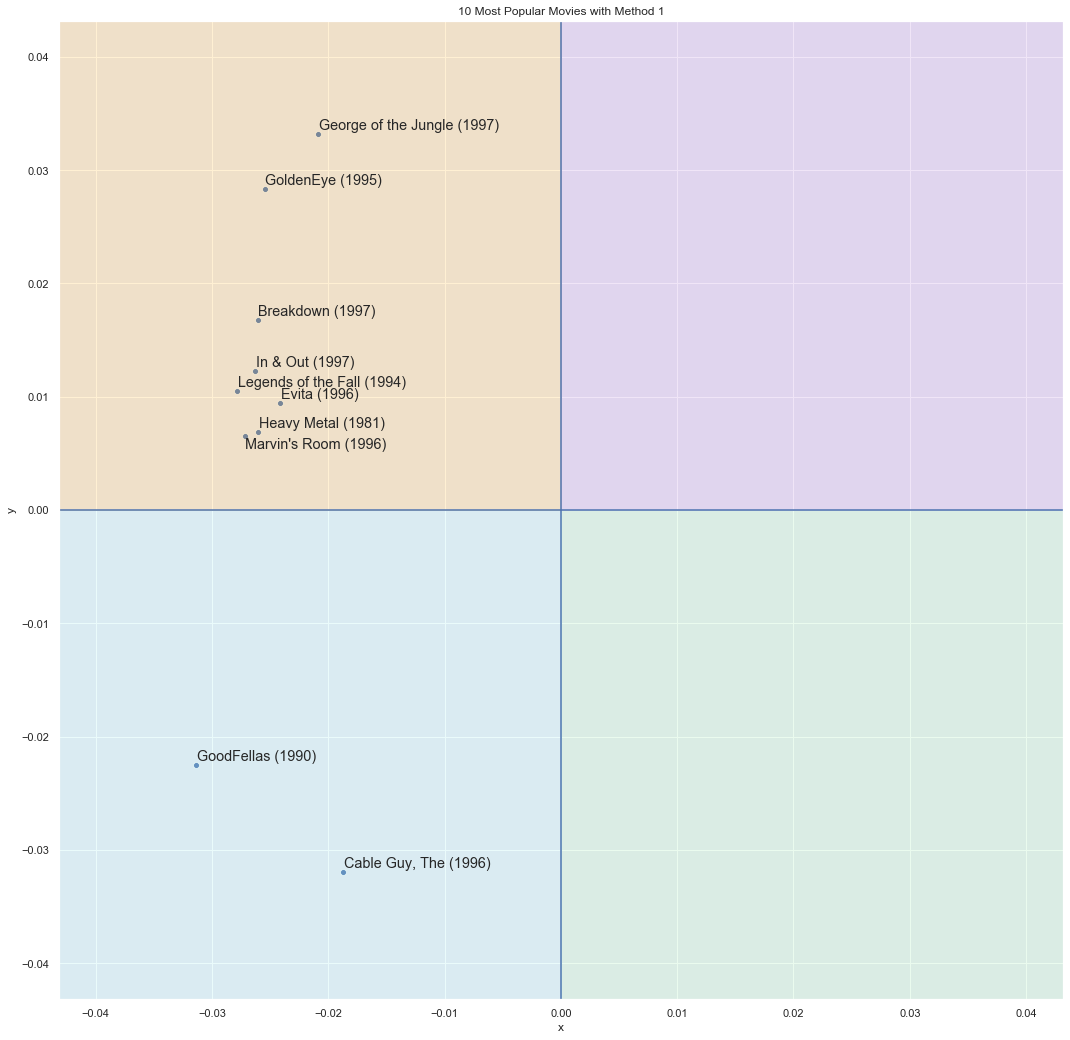

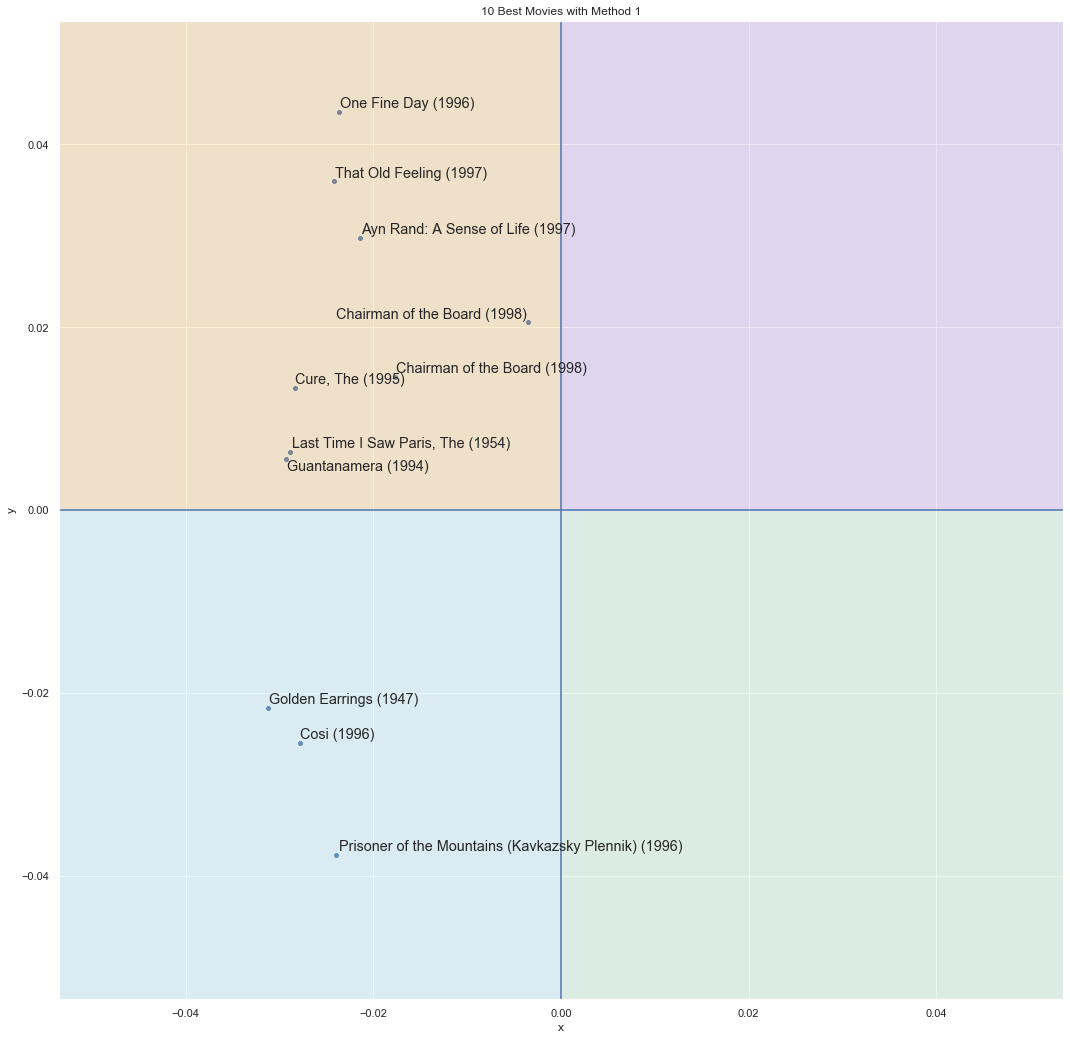

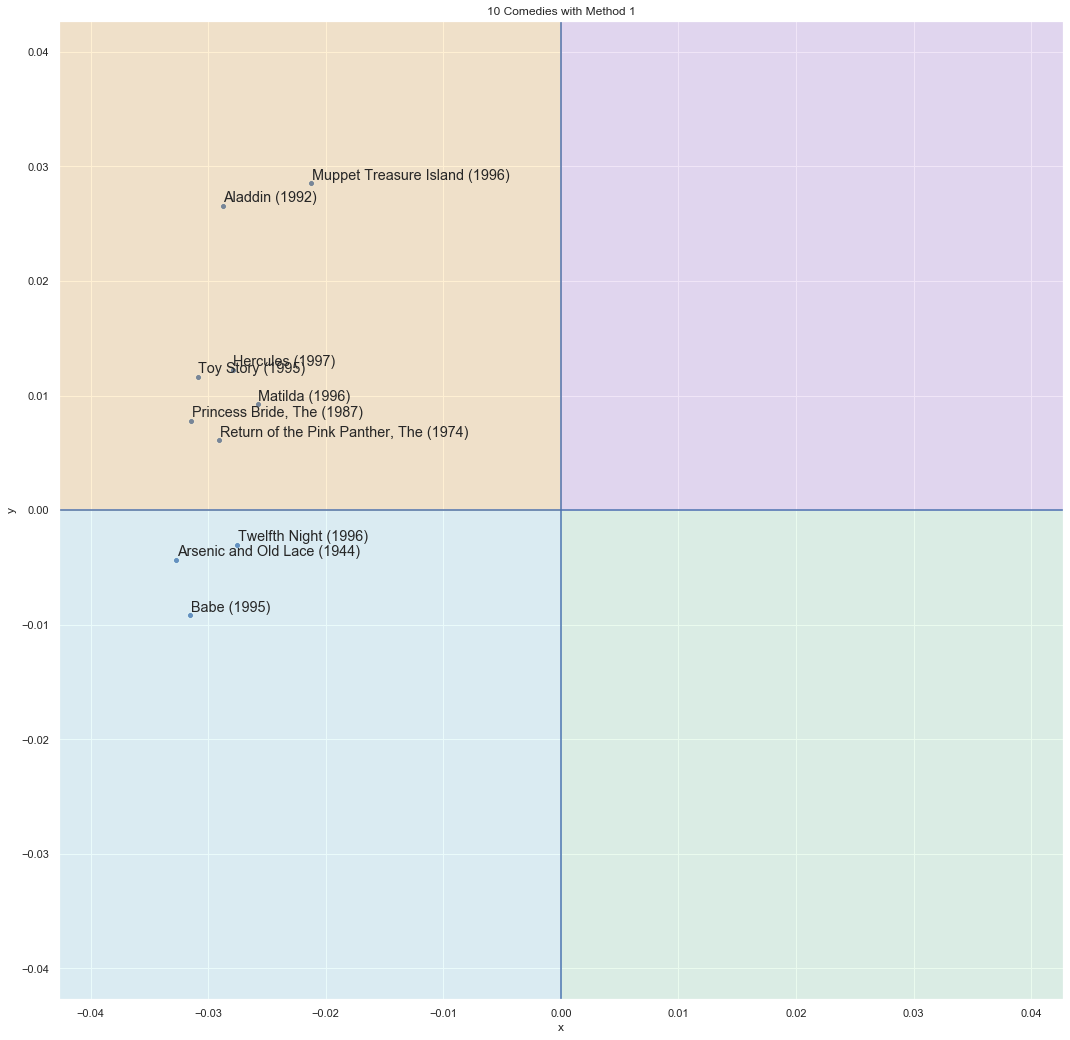

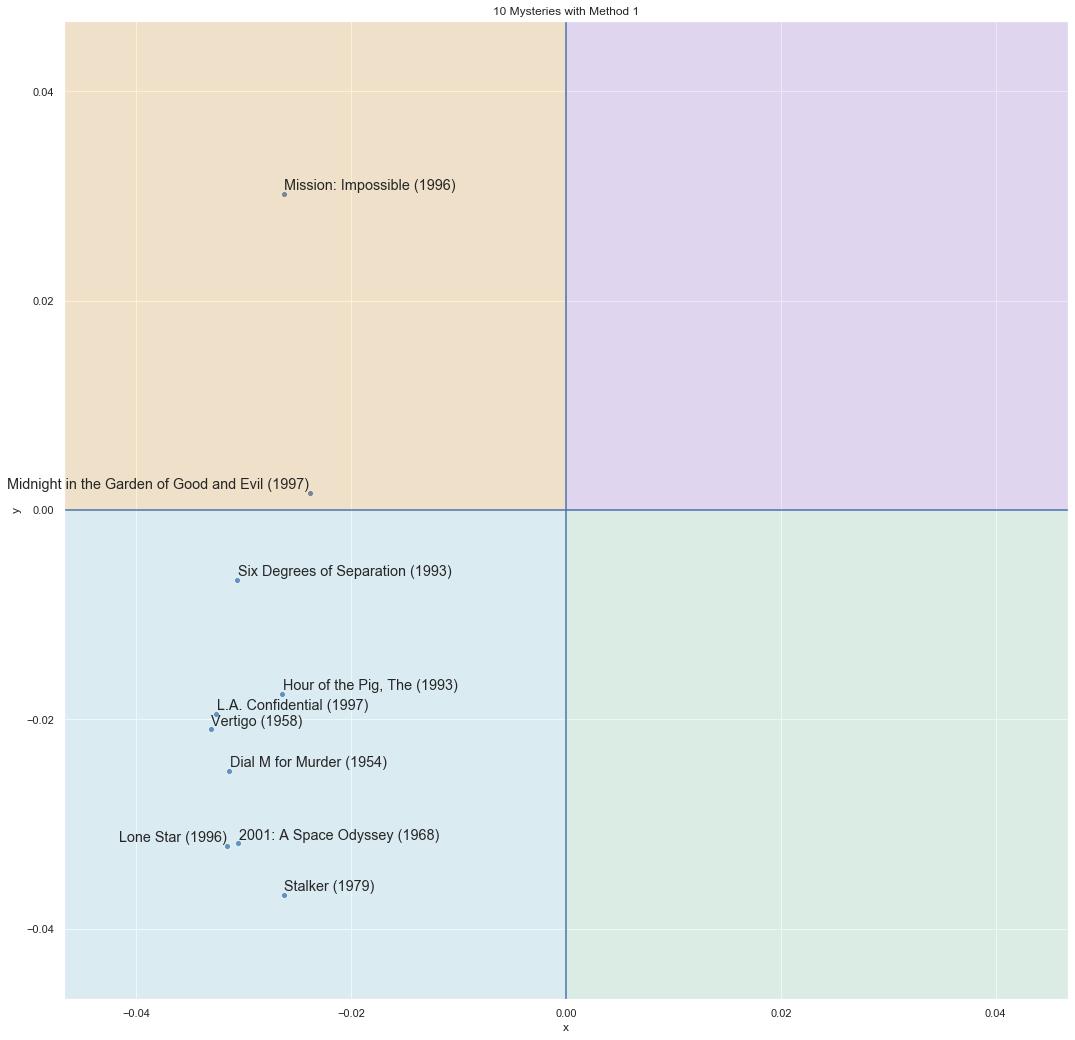

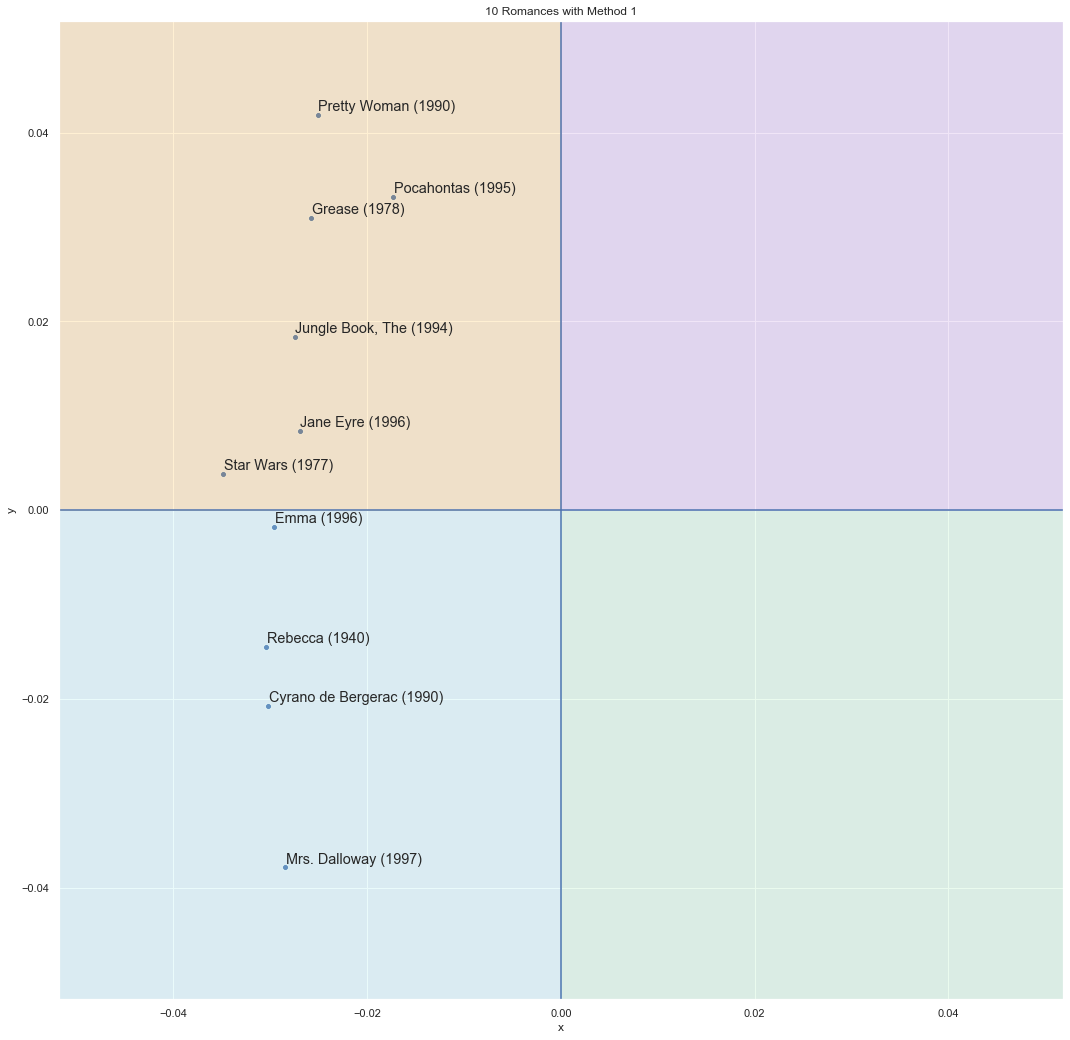

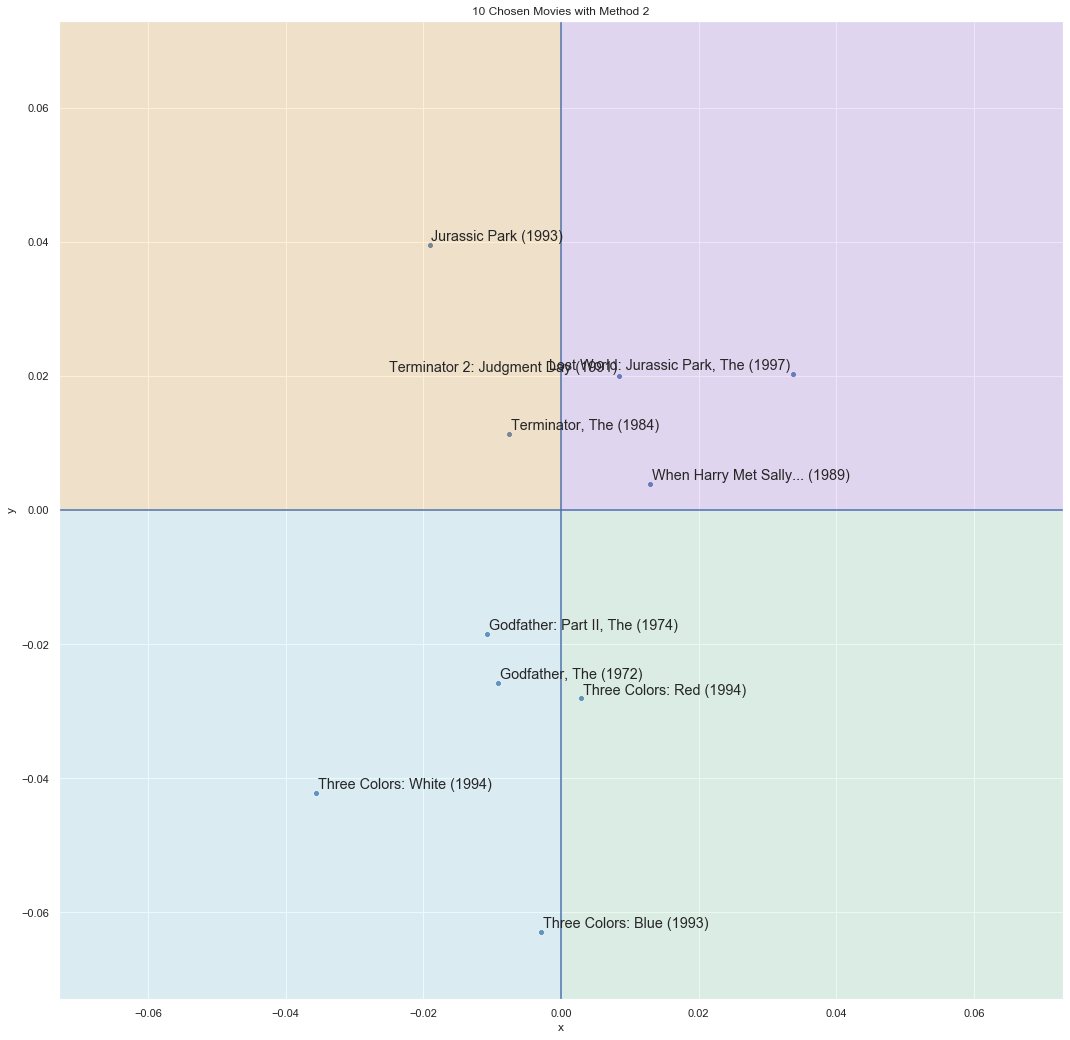

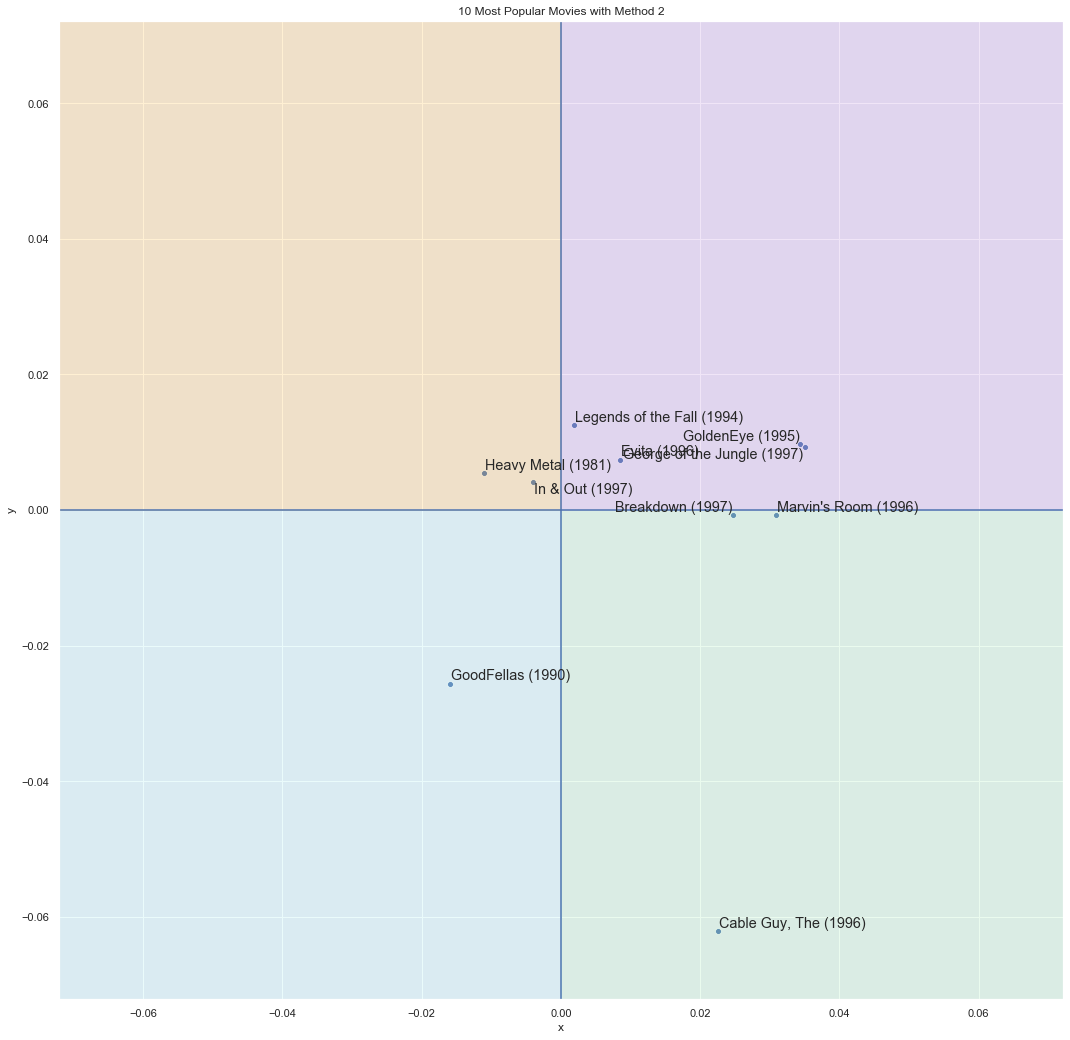

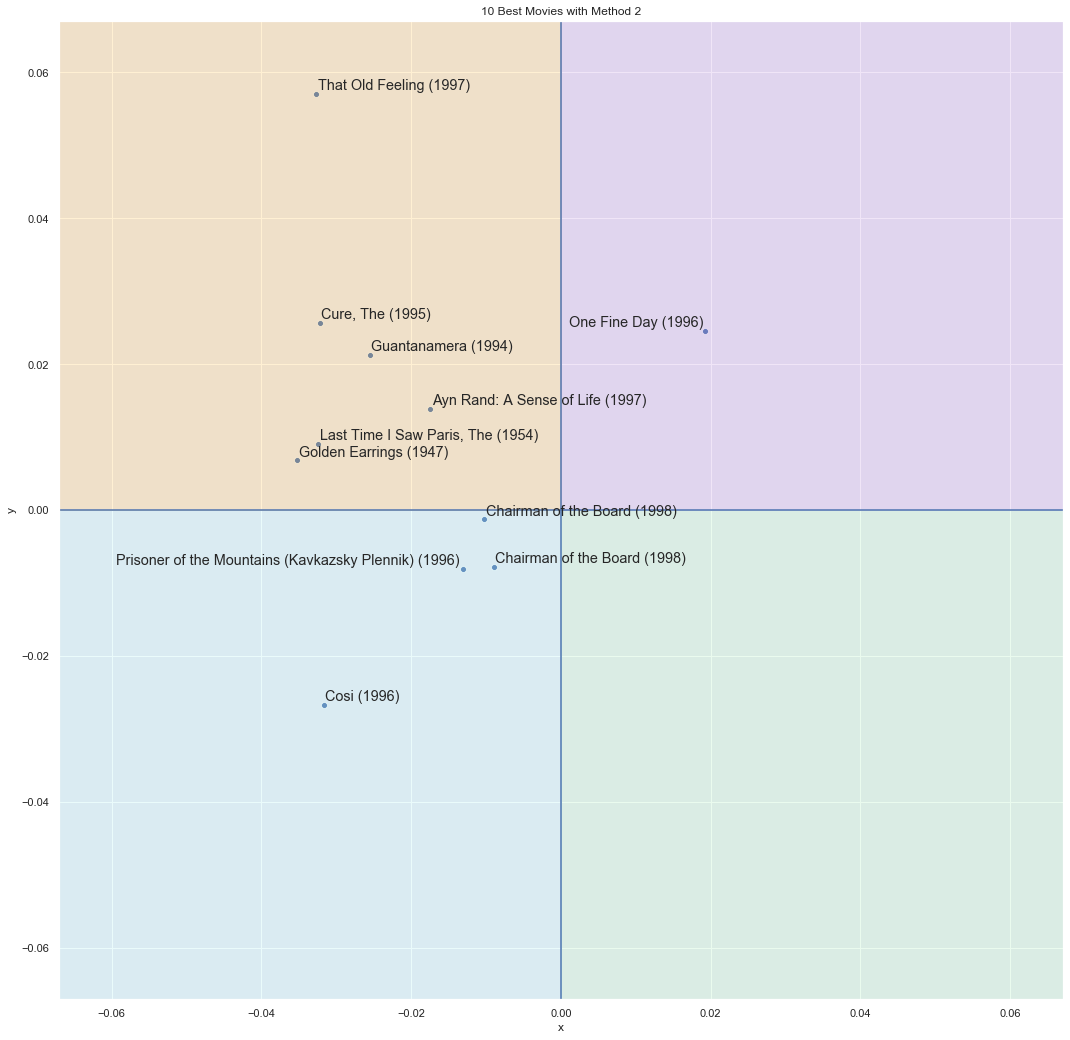

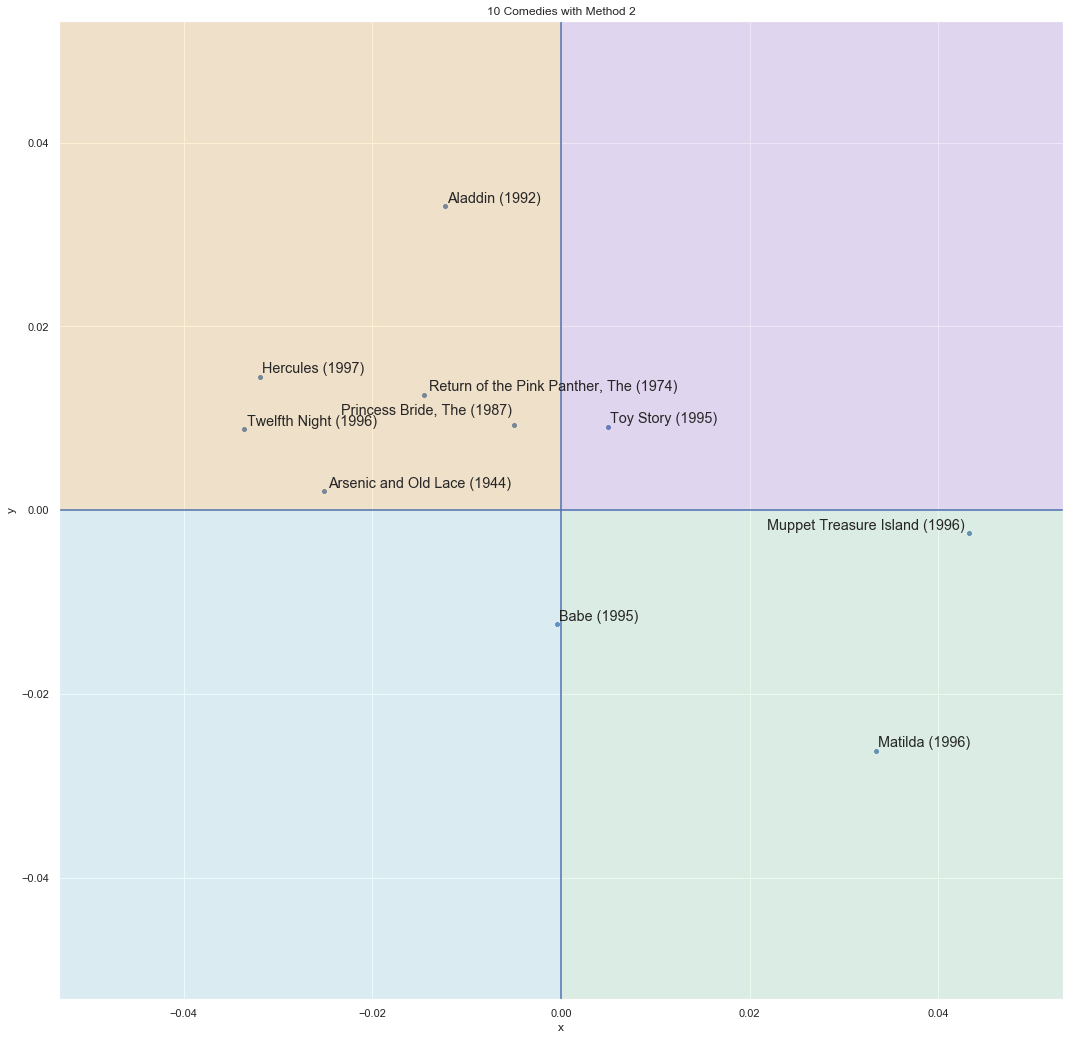

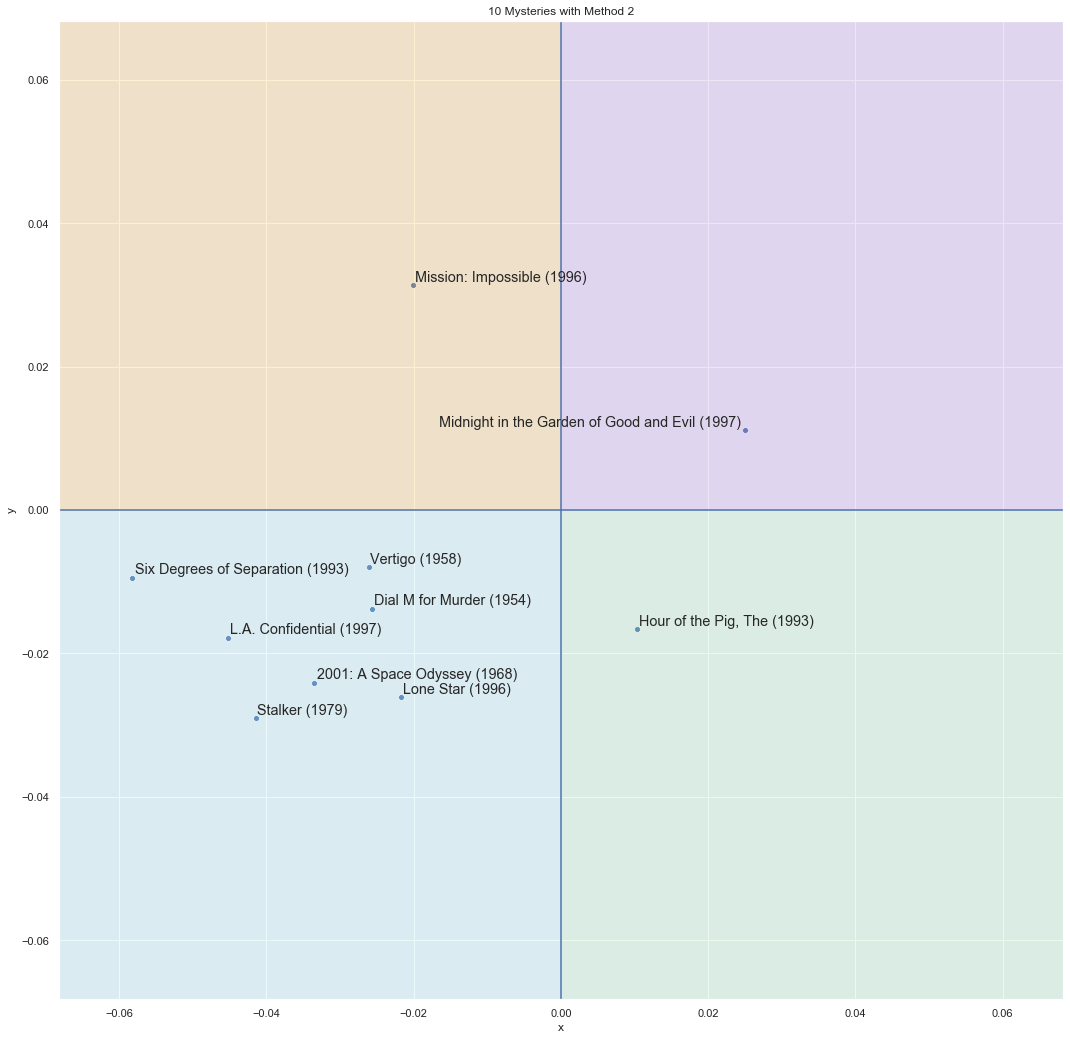

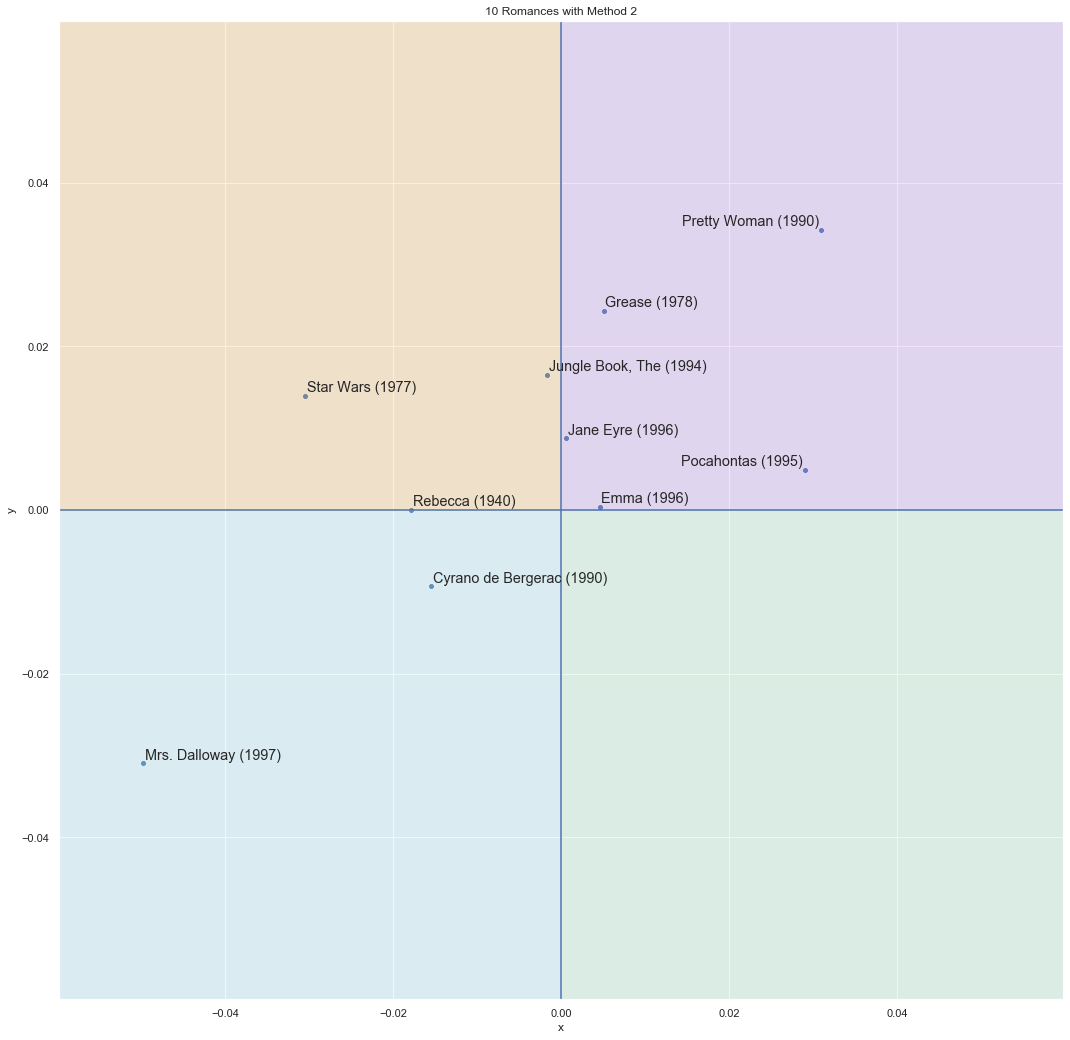

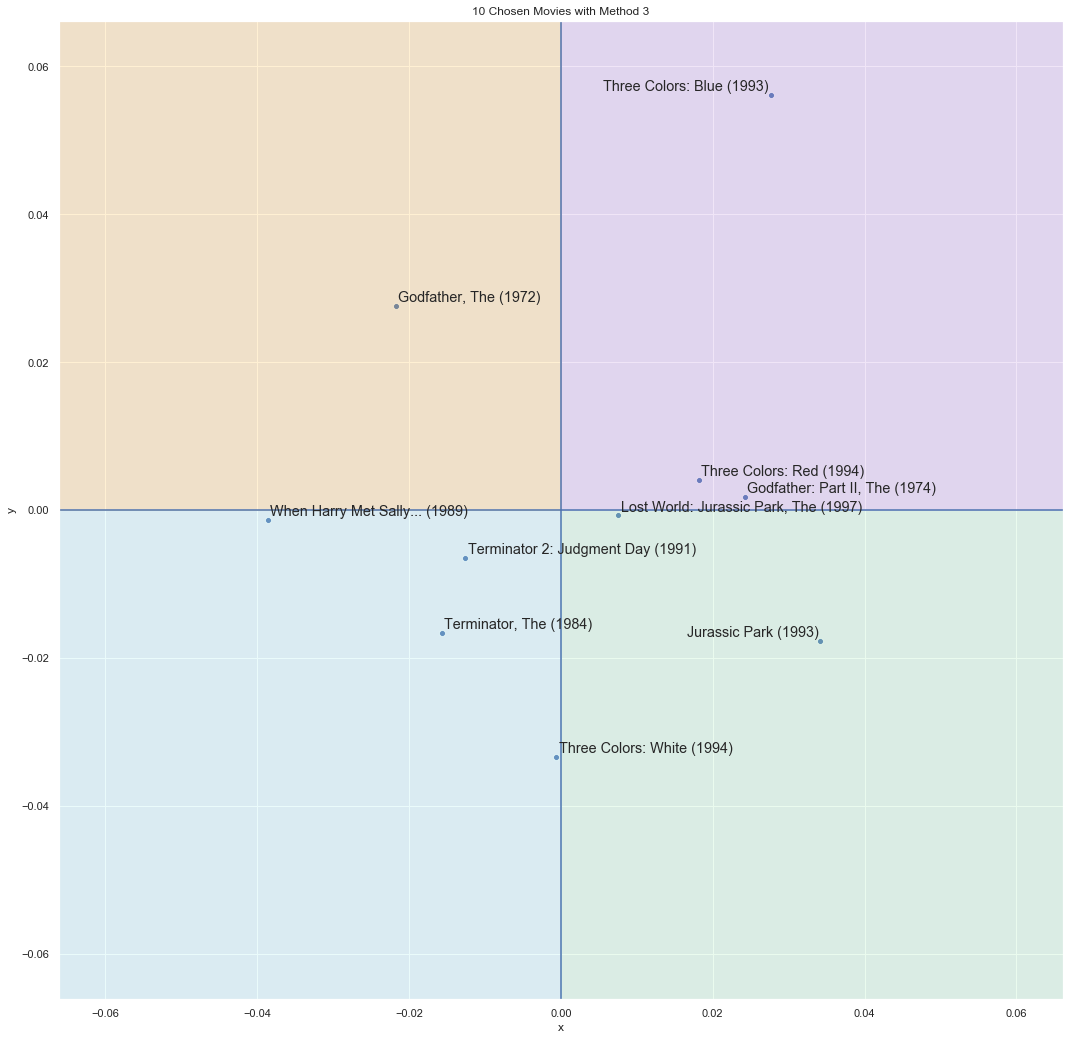

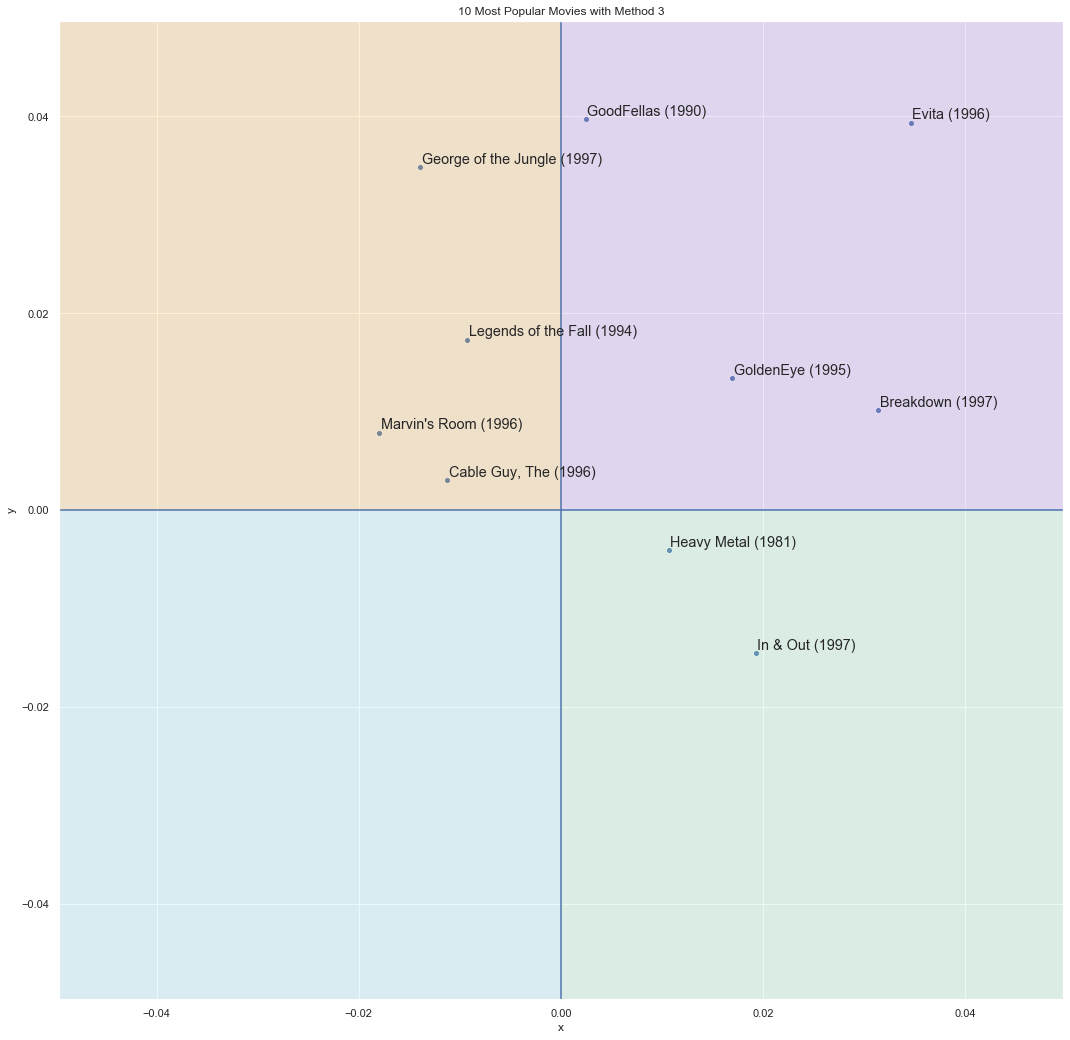

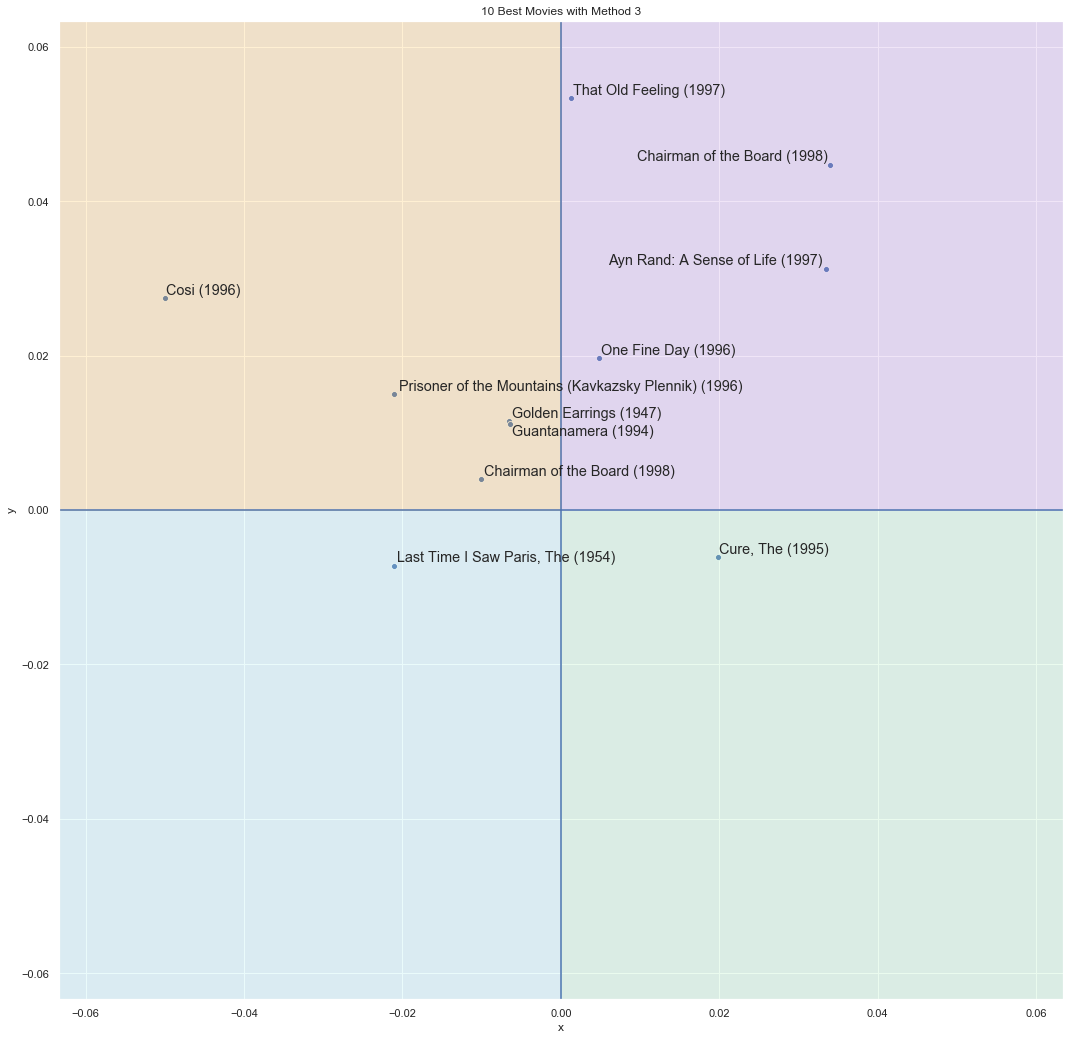

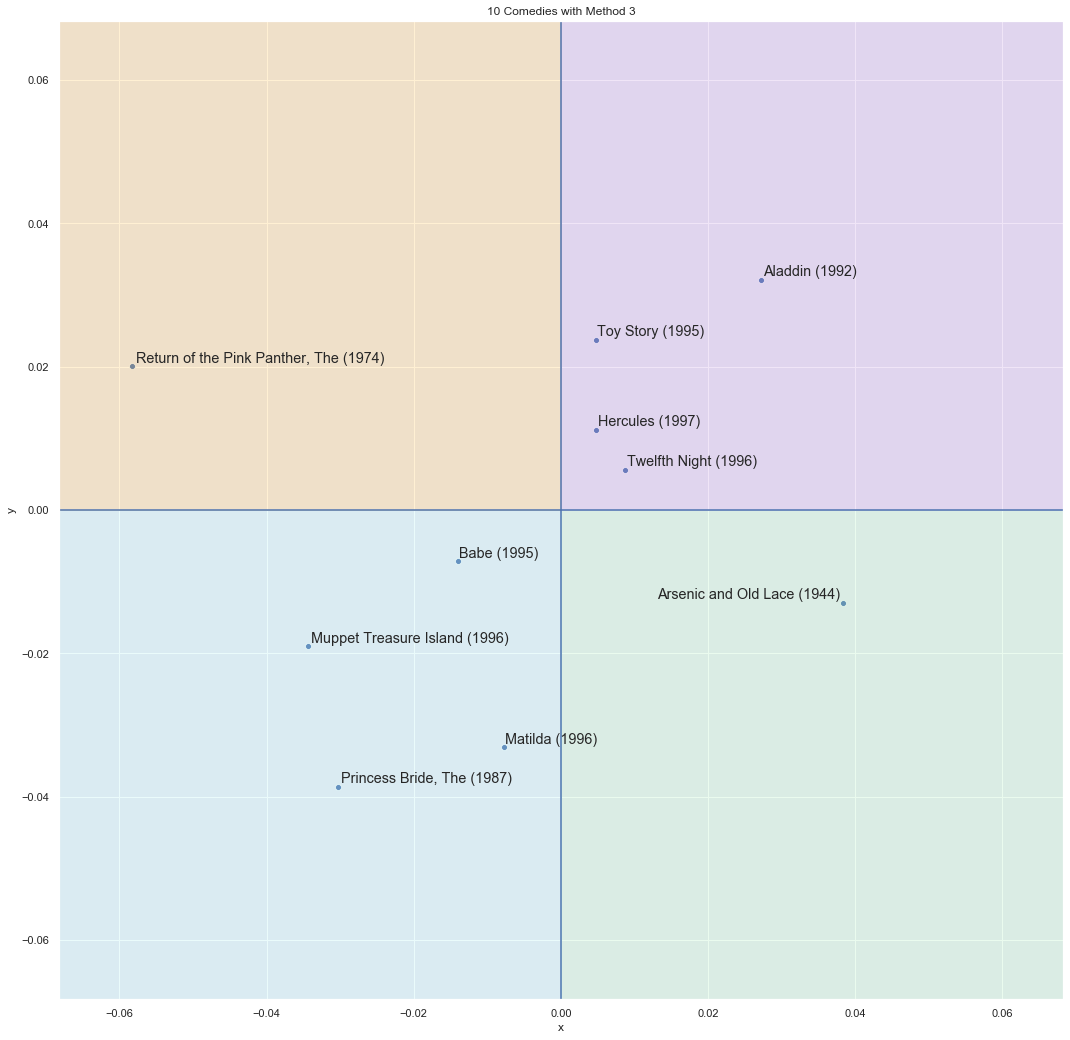

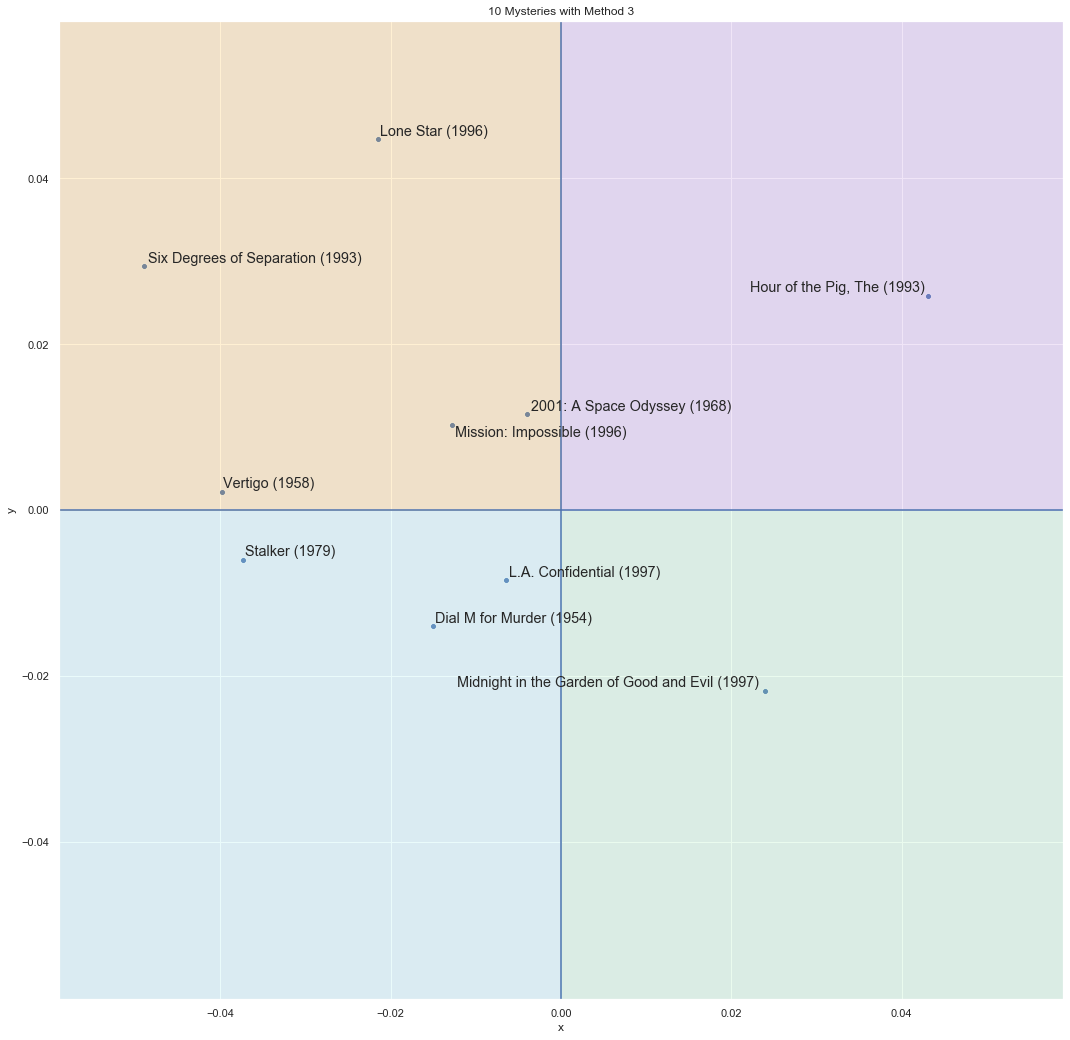

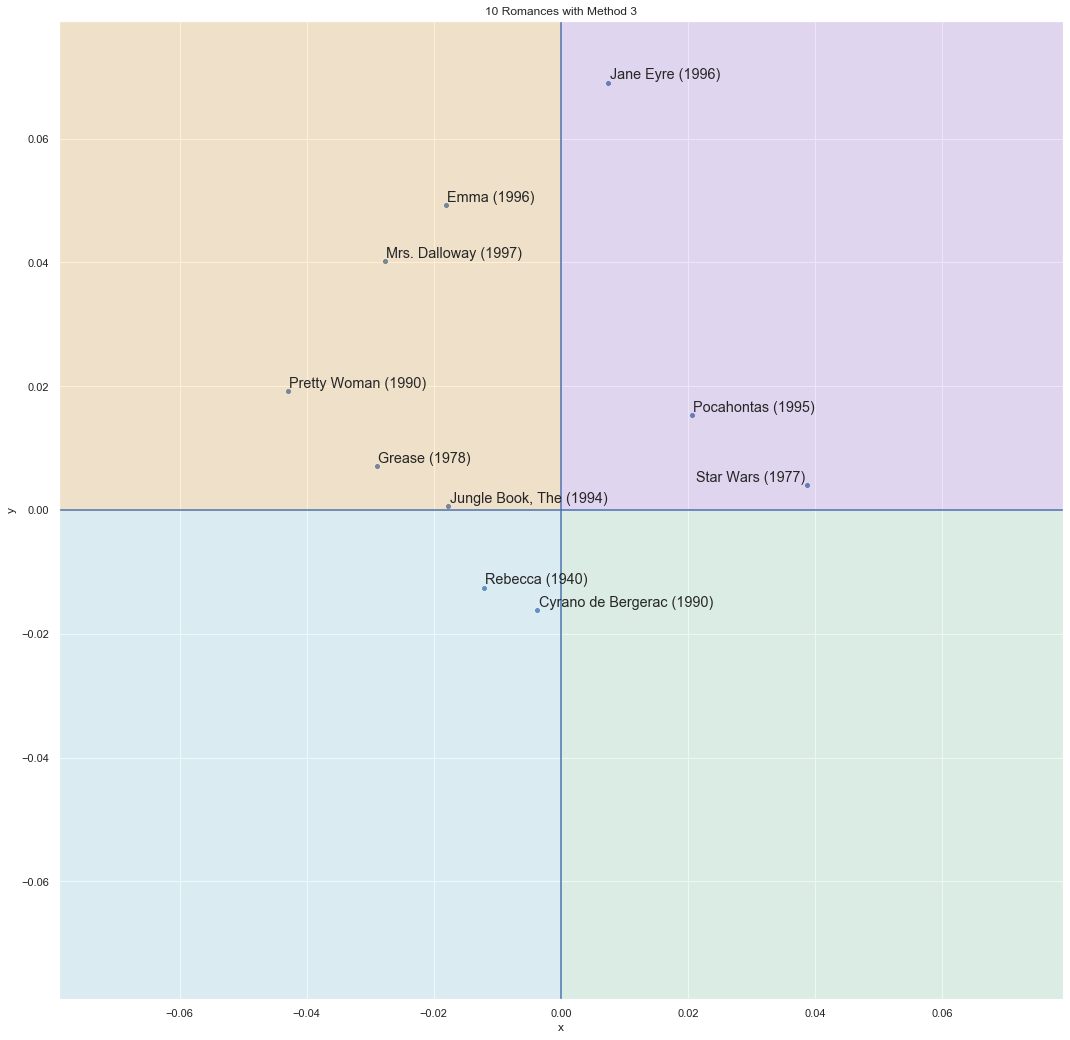

In [113]:
for v in range(len(V_data_files)):
    V_data_title = V_data_files[v]
    V_data = np.loadtxt(V_data_title).astype(float)
    V_data = pd.DataFrame(V_data)
    u, s, vh = np.linalg.svd(V_data, full_matrices=True)
    projection = u[:, 0:2]
    for i in range(len(movie_id_files)):
        movie_id = movie_id_files[i]
        movies = pd.read_csv(movie_id, header = None)
        movies.columns = ["index", "movies"]
        points = pd.DataFrame(data = projection[movies["index"]], index = None)
        points.columns = ["x", "y"]
        points["movies"] = movies["movies"]
        
        fig, ax = plt.subplots(figsize=(18, 18))
        ax = sns.scatterplot(x="x", y="y", data=points)  
        texts = [plt.text(points.x[i], points.y[i], points.movies[i], ha='center', va='center', size='large') for i in range(points.shape[0])]
        adjust_text(texts)

        ax.axvline([0])
        ax.axhline([0])
        border = max(points.x.max(), points.y.max(), -points.x.min(), -points.y.min()) + 0.01
        plt.xlim([-border, border])
        plt.ylim([-border, border])
        plt.title(titles[i] + ' with Method %d' % (v+1))
        ax.fill_between([-0.35, 0],-0.35,0,alpha=0.25, color='#AEF1F3')  
        ax.fill_between([0, 0.35], -0.35, 0, alpha=0.25, color='#AEF3BC') 
        ax.fill_between([-0.35, 0], 0, 0.35, alpha=0.25, color='#FFC552') 
        ax.fill_between([0, 0.35], 0, 0.35, alpha=0.25, color='#C698E3')
        plt.savefig("./plots/" + titles[i] + "_%d.png" % (v+1), bbox_inches='tight')